# $\alpha$ ion-ion streaming instability
Solve in ordinary precision arithmetic, **assuming pure imaginary $\omega$**.  Then $D$ is a real number.  

Calculate $D$ on a 2D grid of $(\omega_i, \phi)$, where $\phi$ is the angle of $\mathbf{k}$ with respect to the streaming velocity.  Then plot the contour level $D=0$ to graphically see where the solutions for the instability are.

In [1]:
import Parameters
import PyPlot as plt
import QuadGK   # Note.  QuadGK seems to work with BigFloat, but NOT ArbComplex
import Roots    # for find_zero.  Parts of it work with univariate complex functions
                #  Note.  Looks like Roots works with BigFloat, but NOT ArbComplex

using FromFile
@from "tools.jl" import tools
@from "plasma_dispersion_tools.jl" import plasma_dispersion_tools

pd = plasma_dispersion_tools

Main.C:\Users\jacot\Documents\Plasma Physics\Other\Jupyter Notebooks\Julia notebooks\plasma_dispersion_tools.jl.plasma_dispersion_tools

In [ ]:
# tau_e = 1
# tau_alpha = 0.001 # or 0.008
# nu_alpha = 0.01
# nu_d = 0.5 - nu_alpha
# ui = 10
# k = 0.01
# phi = 89.5 * pi/180
# kparallelhat = k * cos(phi)
# kperphat = k * sin(phi)
# #kparallelhat = 0.23 / 150
# #kperphat = 0.93 / 150

# function D(omegahat_i)
#     return pd.D_aiisi_real(omegahat_i, kparallelhat, kperphat, nu_d, nu_alpha, tau_e, tau_alpha, ui)
# end
# #aa = Roots.find_zero(D, (0, 0.01), Roots.Brent())

In [2]:
tau_e = 1
tau_alpha = 0.001
nu_alpha = 0.01
nu_d = 0.5 - nu_alpha
ui = 10
k = 0.01
phi = 89.6 * pi/180
kparallelhat = k * cos(phi)
kperphat = k * sin(phi)
#kparallelhat = 0.23 / 150
#kperphat = 0.93 / 150

function D(omegahat_i)
    return pd.D_aiisi_real(omegahat_i, kparallelhat, kperphat, nu_d, nu_alpha, tau_e, tau_alpha, ui)
end
#aa = Roots.find_zero(D, (0, 0.01), Roots.Brent())

D (generic function with 1 method)

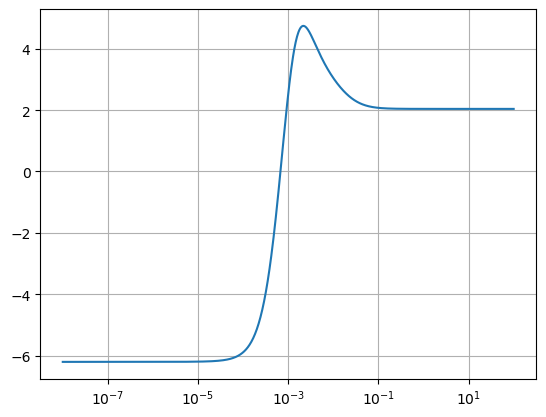

In [28]:
omega_vec = exp10.(range(-8, 2, 1000))
#omega_vec = LinRange(0.0000, .01, 1000)
D_vec = zero(omega_vec)
D_vec = D.(omega_vec)

plt.semilogx(omega_vec, D_vec, "-")
plt.grid()

In [33]:
#val = Roots.find_zero(D, (1e-4,1e-3), Roots.Brent())
val = Roots.find_zero(D, 1e-3, Roots.Secant())
println(val)
println(D(val))

0.0006726246184688735
7.061018436615996e-14


In [41]:
Dfull(val2)

9.681144774731365e-14 - 4.429283406044839e-15im

In [36]:
function Dfull(omegahat)
    return pd.D_aiisi(omegahat, kparallelhat, kperphat, nu_d, nu_alpha, tau_e, tau_alpha, ui)
end

val2 = Roots.find_zero(Dfull, 0.00001 + im*val, Roots.Secant())

5.60380385485837e-19 + 0.0006728073789611045im

In [25]:
Nphi = 140
Nomega = 500
Phi_vec = LinRange(0.95 * pi/2, pi/2, Nphi)
Omega_vec = exp10.(range(-6, 2, Nomega))
#Omega_vec = LinRange(0.0005, 0.01, Nomega)
Darray = zeros(Float64, Nphi, Nomega)

for (i, phi) in enumerate(Phi_vec)
    for (j, omegahat_i) in enumerate(Omega_vec)
        kparallelhat = k * cos(phi)
        kperphat = k * sin(phi)
        Darray[i, j] = pd.D_aiisi_real(omegahat_i, kparallelhat, kperphat, nu_d, nu_alpha, tau_e, tau_alpha, ui)
    end
end

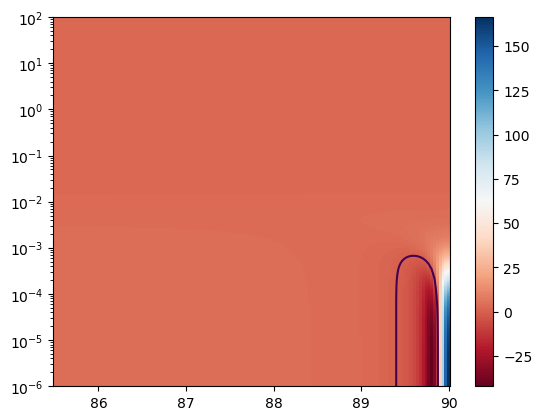

PyObject <matplotlib.contour.QuadContourSet object at 0x00000000BFCA8B80>

In [26]:
Phi_vec_d = Phi_vec * 180/pi
fig, ax = plt.subplots()
plt.pcolormesh(Phi_vec_d, Omega_vec, Darray', cmap=plt.cm.RdBu)
ax.set_yscale("log")
plt.colorbar()
#plt.clim(-10, 10)
plt.contour(Phi_vec_d, Omega_vec, Darray', [0])


# With kinetic electrons

In [59]:
tau_e = 1
tau_alpha = 0.02
nu_alpha = 0.01
nu_d = 0.5 - nu_alpha
ui = 10
k = 0.75
phi = 89.4 * pi/180
kparallelhat = k * cos(phi)
kperphat = k * sin(phi)
#kparallelhat = 0.23 / 150
#kperphat = 0.93 / 150

function Dke(omegahat_i)
    return pd.D_aiisi_electrons_real(omegahat_i, kparallelhat, kperphat, nu_d, nu_alpha, tau_e, tau_alpha, ui)
end
#aa = Roots.find_zero(D, (0, 0.01), Roots.Brent())

Dke (generic function with 1 method)

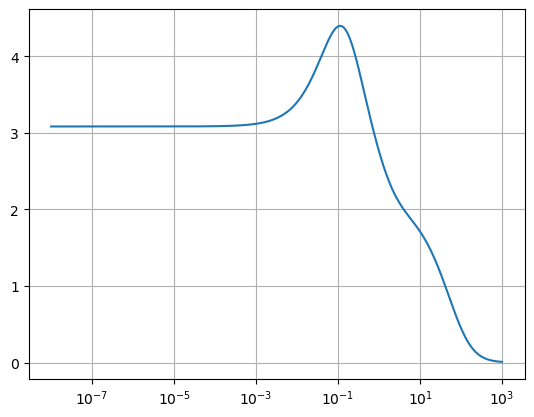

In [60]:
omega_vec = exp10.(range(-8, 3, 1000))
#omega_vec = LinRange(0.0000, .01, 1000)
Dke_vec = zero(omega_vec)
Dke_vec = Dke.(omega_vec)

plt.semilogx(omega_vec, Dke_vec, "-")
plt.grid()

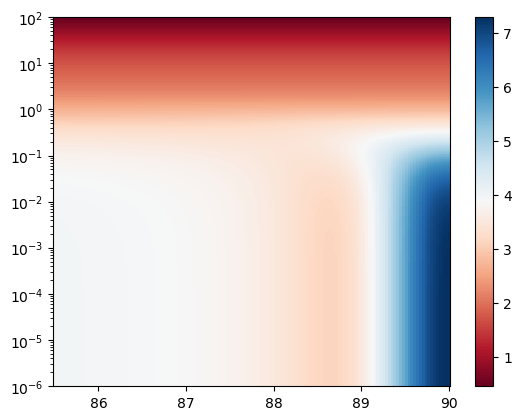

sys:1: UserWarning: No contour levels were found within the data range.


PyObject <matplotlib.contour.QuadContourSet object at 0x000000006FA6F5B0>

In [54]:
Nphi = 140
Nomega = 500
Phi_vec = LinRange(0.95 * pi/2, pi/2, Nphi)
Omega_vec = exp10.(range(-6, 2, Nomega))
#Omega_vec = LinRange(0.0005, 0.01, Nomega)
Darray = zeros(Float64, Nphi, Nomega)

for (i, phi) in enumerate(Phi_vec)
    for (j, omegahat_i) in enumerate(Omega_vec)
        kparallelhat = k * cos(phi)
        kperphat = k * sin(phi)
        Darray[i, j] = pd.D_aiisi_electrons_real(omegahat_i, kparallelhat, kperphat, nu_d, nu_alpha, tau_e, tau_alpha, ui)
    end
end

Phi_vec_d = Phi_vec * 180/pi
fig, ax = plt.subplots()
plt.pcolormesh(Phi_vec_d, Omega_vec, Darray', cmap=plt.cm.RdBu)
ax.set_yscale("log")
plt.colorbar()
#plt.clim(-10, 10)
plt.contour(Phi_vec_d, Omega_vec, Darray', [0])


### Full solve.  Do not assume $\omega$ imaginary

In [6]:
function Dfull(omegahat)
    D, Dprime = pd.DDprime_aiisi(omegahat, kparallelhat, kperphat, nu_d, nu_alpha, tau_e, tau_alpha, ui)
    return D
end

function Dprime(omegahat)
    D, Dprime = pd.DDprime_aiisi(omegahat, kparallelhat, kperphat, nu_d, nu_alpha, tau_e, tau_alpha, ui)
    return Dprime
end
#val2 = Roots.find_zero(Dfull, 0.00001 + im*val, Roots.Secant())

Dprime (generic function with 1 method)

In [51]:
a = 0.2 + 0.1*im
h = 1e-3
df1 = tools.numerical_complex_derivatve(Dfull, a, h)

-0.8396858406441582 + 2.2191733516223473im

In [52]:
df2 = Dprime(a)

-0.8396859477513284 + 2.2191732999625207im